<a href="https://colab.research.google.com/github/khanyisa-mabasa/KHANYISA-MABASA-PORTFOLIOO/blob/main/Breast_Cancer_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#CNN FOR BREAST CANCER DETECTION
#STEP 1: Installing and Setup
#Installing TensorFlow
!pip install tensorflow

import tensorflow as tf
print(tf.__version__)

2.19.0


In [16]:
#CNN FOR BREAST CANCER DETECTION


#STEP 1: Installation and Setup
 # Installing TensorFlow

import tensorflow as tf


print(tf.__version__)


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

2.19.0


In [17]:
# STEP 2: Data Preprocessing
from sklearn import datasets, metrics

# import the dataset
# cancer=pd.read_csv('/content/data.csv')
cancer = datasets.load_breast_cancer()

print(cancer.DESCR)


# matrix of features, ( independent viriables)
x = pd.DataFrame(data = cancer.data, columns=cancer.feature_names)


x.head()


# dependent variable
y = cancer.target
print(y)

cancer.target_names

x.shape, y.shape

# splitting the dataset in train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 0)

x_train.shape, x_test.shape


# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

x_train

x_train.shape, x_test.shape


x_train = x_train.reshape(x_train.shape[0], 30, 1)
x_test = x_test.reshape(x_test.shape[0], 30, 1)


x_train.shape, x_test.shape

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

((284, 30, 1), (285, 30, 1))

In [18]:
#STEP 3: Buildinjg the Model
# define an object
model = tf.keras.models.Sequential()


# First CNN layer
model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=2, activation='relu', input_shape = (30, 1)))
# batch normalization
model.add(tf.keras.layers.BatchNormalization())
# dropout layer
model.add(tf.keras.layers.Dropout(0.2))


# second CNN layer
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=2, activation='relu'))
# batch normalization
model.add(tf.keras.layers.BatchNormalization())
# dropout layer
model.add(tf.keras.layers.Dropout(0.4))


# flatten layer
model.add(tf.keras.layers.Flatten())


# dense layer
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
# output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))



model.summary()


# compile model
opt = tf.keras.optimizers.Adam(learning_rate=0.00005)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_2 (Conv1D)               │ (None, 29, 32)         │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 29, 32)         │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 29, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 28, 64)         │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 28, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1792)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │       114,752 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,457 (466.63 KB)

 Trainable params: 119,265 (465.88 KB)

 Non-trainable params: 192 (768.00 B)

In [19]:
#STEP 4: Training the Model


# Convert numpy arrays to TensorFlow tensors with explicit dtypes
x_train_tensor = tf.convert_to_tensor(x_train, dtype=tf.float32)
y_train_tensor = tf.convert_to_tensor(y_train, dtype=tf.int32)
x_test_tensor = tf.convert_to_tensor(x_test, dtype=tf.float32)
y_test_tensor = tf.convert_to_tensor(y_test, dtype=tf.int32)

# Define Early Stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=10,         # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True # Restore model weights from the epoch with the best value of the monitored quantity.
)

history =  model.fit(x_train_tensor, y_train_tensor, epochs=50, validation_data=(x_test_tensor, y_test_tensor), callbacks=[early_stopping])

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 80ms/step - accuracy: 0.4326 - loss: 0.9943 - val_accuracy: 0.3930 - val_loss: 0.6752
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6178 - loss: 0.6630 - val_accuracy: 0.6772 - val_loss: 0.6417
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7376 - loss: 0.4779 - val_accuracy: 0.8912 - val_loss: 0.6083
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.8583 - loss: 0.4176 - val_accuracy: 0.9439 - val_loss: 0.5747
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.8448 - loss: 0.3172 - val_accuracy: 0.9333 - val_loss: 0.5411
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.8785 - loss: 0.3076 - val_accuracy: 0.9404 - val_loss: 0.5094
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.9352 - loss: 0.2165 - val_accuracy: 0.9404 - val_loss: 0.4798
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.9289 - loss: 0.2138 - val_accuracy: 0.9368 - val_loss: 0.4520


In [20]:

# STEP 5: Model Prediction


y_pred = (model.predict(x_test_tensor) > 0.5).astype('int32')


print(y_pred[12]), print(y_test[12])


# cancer.target_names


# confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)


acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
[1]
1
[[ 89  12]
 [  0 184]]
0.9578947368421052


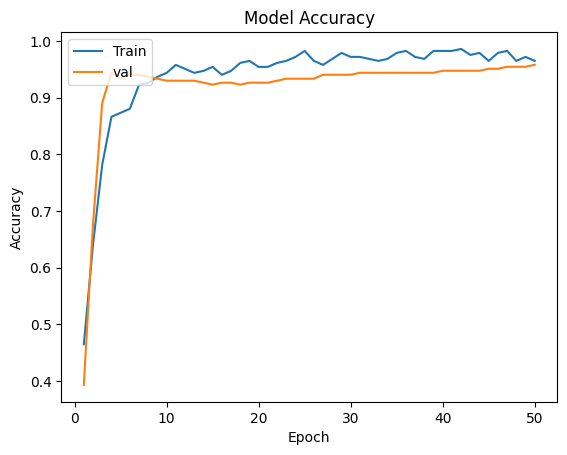

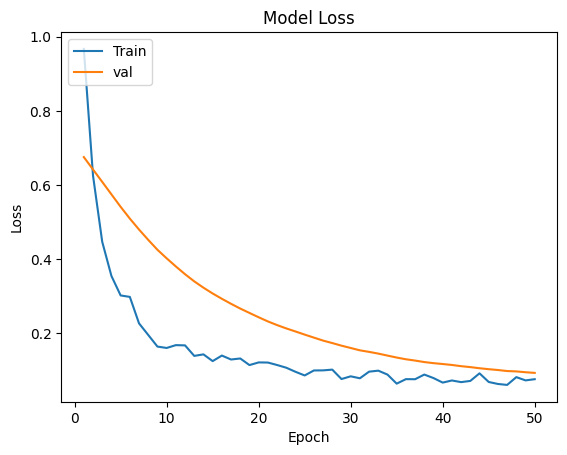

In [21]:
#STEP 6:Learning Curve


def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()


learning_curve(history, 50)
